In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/avazu-ctr-prediction/sampleSubmission.gz
/kaggle/input/avazu-ctr-prediction/train.gz
/kaggle/input/avazu-ctr-prediction/test.gz
/kaggle/input/ctr-prediction-1/__results__.html
/kaggle/input/ctr-prediction-1/__resultx__.html
/kaggle/input/ctr-prediction-1/__notebook__.ipynb
/kaggle/input/ctr-prediction-1/__output__.json
/kaggle/input/ctr-prediction-1/custom.css
/kaggle/input/ctr-prediction-1/__results___files/__results___19_2.png


In [2]:
import os
print(os.listdir("/kaggle/input"))


['avazu-ctr-prediction', 'ctr-prediction-1']


In [3]:
import os

# Let's list what's inside the avazu dataset folder
print("Files inside avazu-ctr-prediction:")
print(os.listdir("/kaggle/input/avazu-ctr-prediction"))


Files inside avazu-ctr-prediction:
['sampleSubmission.gz', 'train.gz', 'test.gz']


In [4]:
import pandas as pd

# Load 100,000 rows from the compressed train.gz file
df = pd.read_csv("/kaggle/input/avazu-ctr-prediction/train.gz", nrows=100000)

# Preview the data
df.head()


,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.000009e+18,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,-1,79
1,1.000017e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
2,1.000037e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
3,1.000064e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,100084,79
4,1.000068e+19,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157


In [5]:
from sklearn.preprocessing import LabelEncoder

# Separate features and target
y = df["click"]
X = df.drop(columns=["id", "click"])

# Apply label encoding to all columns
for col in X.columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))


In [6]:
from sklearn.model_selection import train_test_split

# 80/20 split for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
import lightgbm as lgb

# Define the model
model = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Fit the model
model.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 13961, number of negative: 66039
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011650 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1920
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.174512 -> initscore=-1.553978
[LightGBM] [Info] Start training from score -1.553978


LGBMClassifier(random_state=42)

In [8]:
from sklearn.metrics import roc_auc_score, log_loss

# Predict probabilities
y_pred = model.predict_proba(X_test)[:, 1]

# Evaluate using AUC and Log Loss
auc = roc_auc_score(y_test, y_pred)
loss = log_loss(y_test, y_pred)

print(f"AUC Score: {auc:.4f}")
print(f"Log Loss: {loss:.4f}")


AUC Score: 0.7375
Log Loss: 0.4111


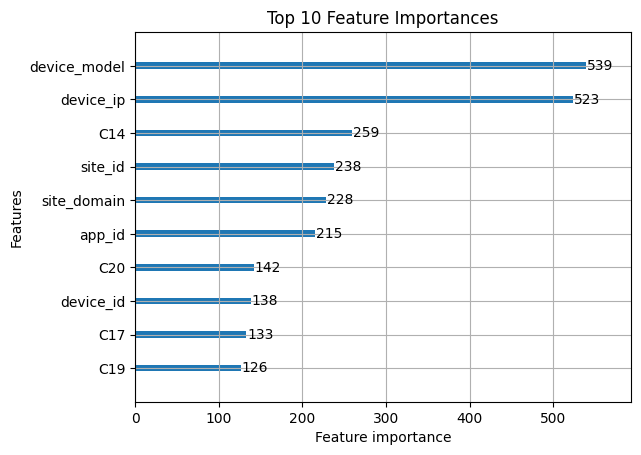

In [9]:
import matplotlib.pyplot as plt
lgb.plot_importance(model, max_num_features=10)
plt.title("Top 10 Feature Importances")
plt.show()
